In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import sys, os

sys.path.append("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/MULE")

from packs.core import io as io

from scipy.optimize import curve_fit
from scipy.special import erfc

In [2]:
argon1_0704 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/argon/testing0704/Artry1_dig1-DT5740-915_CH2_20250407170055-17.h5", samples = 1251)
argon2_0804 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/argon/testing0804/ArTry2_dig1-DT5740-915_CH2_20250408122434-05.h5", samples = 1563)
argon3_0804 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/argon/testing0804/ArTry3_dig1-DT5740-915_CH2_20250408151415-17.h5", samples = 624)
argon4_0804 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/argon/testing0804/ArTry4_dig1-DT5740-915_CH2_20250408153338-18.h5", samples = 624)
argon5_0804 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/argon/testing0804/ArTry5_dig1-DT5740-915_CH2_20250408154344-19.h5", samples = 624)
argon6_0804 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/argon/testing0804/ArTry2_dig1-DT5740-915_CH2_20250408122434-05.h5", samples = 1563)
argon7_1504 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/argon/testing1504/ArTry7_dig1-DT5740-915_CH2_20250415152041-06.h5", samples = 1563)
argon8_1504 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/argon/testing1504/ArTry8_dig1-DT5740-915_CH2_20250415155400-08.h5", samples = 1563)
argon9_1604 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/argon/testing1604/ArTry9_dig1-DT5740-915_CH2_20250416164337-06.h5", samples = 1563)
argon10_1704 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/argon/testing1704/ArTry10_dig1-DT5740-915_CH2_20250417141624-04.h5", samples = 1563)
argon11_1704 = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/argon/testing1704/ArTry11_dig1-DT5740-915_CH2_20250417143422-06.h5", samples = 1563)

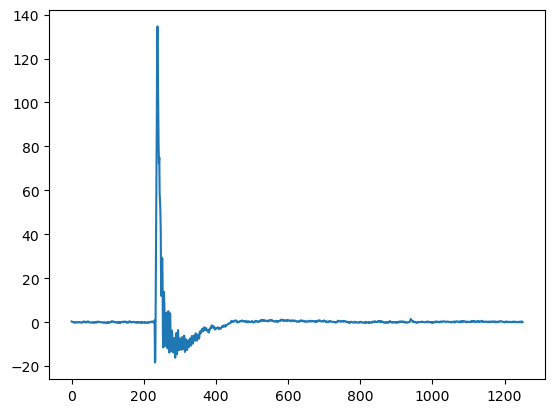

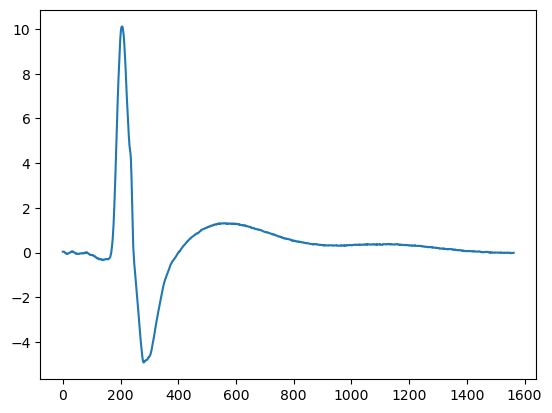

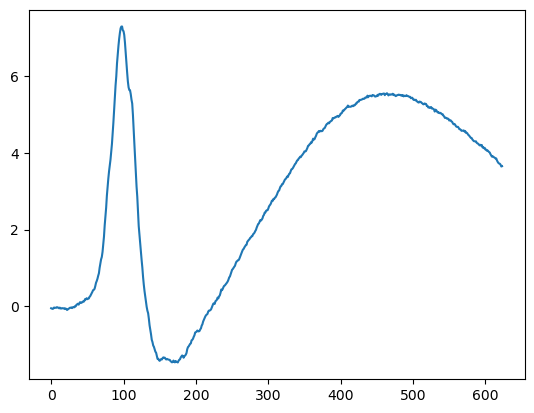

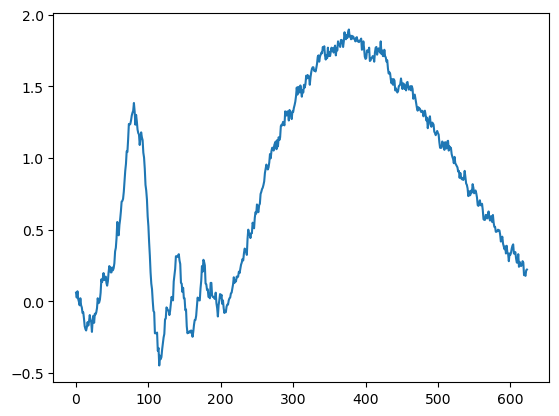

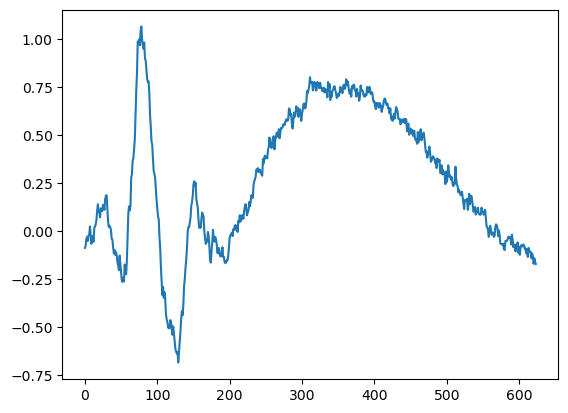

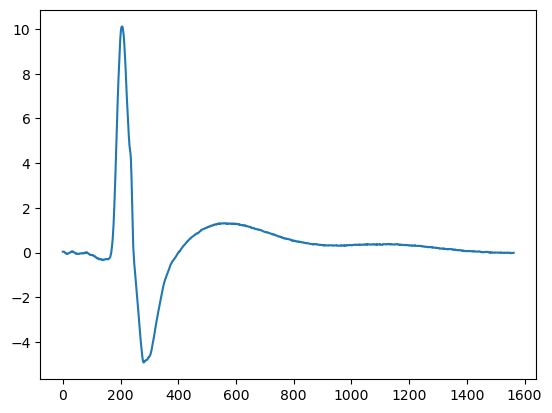

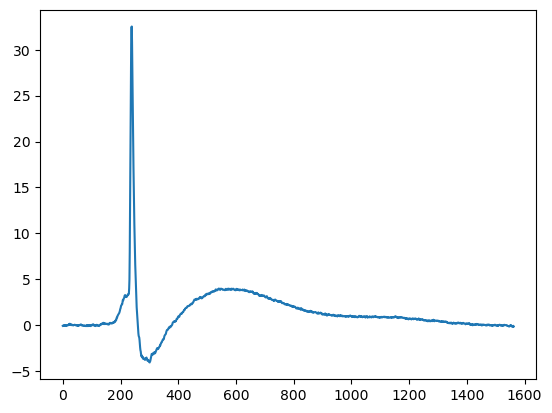

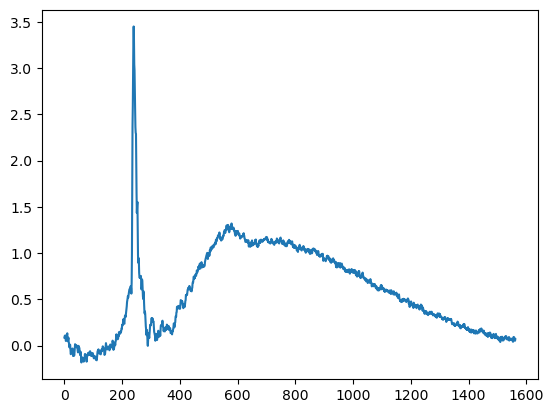

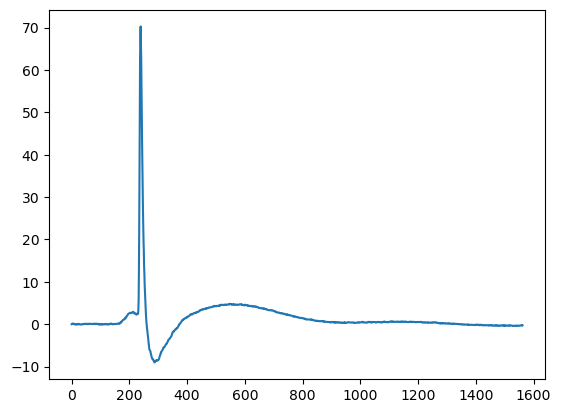

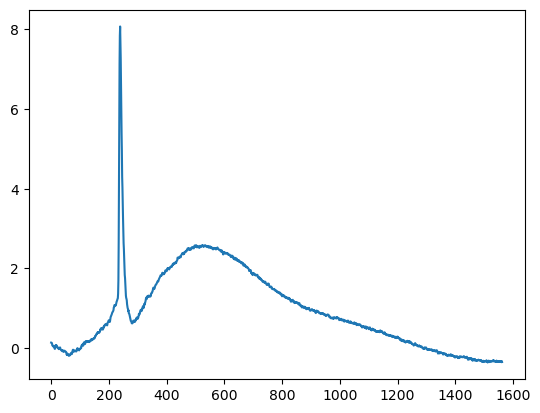

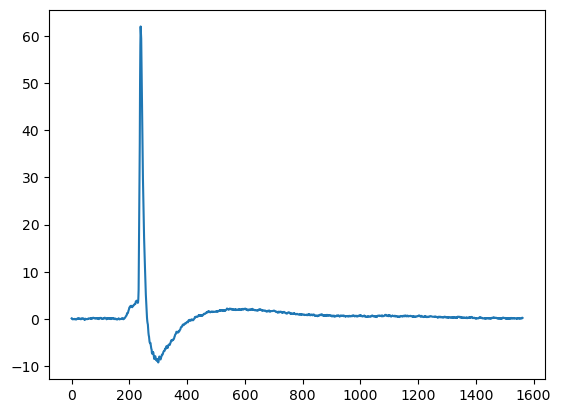

In [3]:
# bs = baseline subtracted

argon1_0704_bs = argon1_0704.copy(deep=True)
argon2_0804_bs = argon2_0804.copy(deep=True)
argon3_0804_bs = argon3_0804.copy(deep=True)
argon4_0804_bs = argon4_0804.copy(deep=True)
argon5_0804_bs = argon5_0804.copy(deep=True)
argon6_0804_bs = argon6_0804.copy(deep=True)
argon7_1504_bs = argon7_1504.copy(deep=True)
argon8_1504_bs = argon8_1504.copy(deep=True)
argon9_1604_bs = argon9_1604.copy(deep=True)
argon10_1704_bs = argon10_1704.copy(deep=True)
argon11_1704_bs = argon11_1704.copy(deep=True)
argon_bs = [argon1_0704_bs, argon2_0804_bs, argon3_0804_bs, argon4_0804_bs, argon5_0804_bs, argon6_0804_bs, argon7_1504_bs, argon8_1504_bs, argon9_1604_bs, argon10_1704_bs, argon11_1704_bs]

for argon in argon_bs:
    for i in range(len(argon.rwf)):
        baseline = np.mean(argon.rwf[i][0:50])
        argon.at[i, 'rwf'] = argon.rwf[i] - baseline
        #plt.plot(argon.rwf[i])
        #plt.plot(np.argmax(argon.rwf[i]), argon.rwf[i][np.argmax(argon.rwf[i])], "ro")
        #plt.plot(roi1[i][0], argon.rwf[i][int(roi1[i][0])], "bo")
        #plt.plot(roi1[i][1], argon.rwf[i][int(roi1[i][1])], "go")
        #plt.show()
    argon_avg = np.mean(argon.rwf, axis = 0)
    plt.plot(argon_avg)
    #plt.plot(50, nRUN_avg[50], "ro")
    #plt.plot(100, nRUN_avg[100], "ro")
    plt.show()

In [4]:
# roi = region of integration from trigger

roi1 = np.zeros((len(argon1_0704_bs.rwf), 2))
roi2 = np.zeros((len(argon2_0804_bs.rwf), 2))
roi3 = np.zeros((len(argon3_0804_bs.rwf), 2))
roi4 = np.zeros((len(argon4_0804_bs.rwf), 2))
roi5 = np.zeros((len(argon5_0804_bs.rwf), 2))
roi6 = np.zeros((len(argon6_0804_bs.rwf), 2))
roi7 = np.zeros((len(argon7_1504_bs.rwf), 2))
roi8 = np.zeros((len(argon8_1504_bs.rwf), 2))
roi9 = np.zeros((len(argon9_1604_bs.rwf), 2))
roi10 = np.zeros((len(argon10_1704_bs.rwf), 2))
roi11 = np.zeros((len(argon11_1704_bs.rwf), 2))
roi = [roi1, roi2, roi3, roi4, roi5, roi6, roi7, roi8, roi9, roi10, roi11]

for run in range(len(argon_bs)):
    for i in range(len(argon_bs[run].rwf)):
        signal = argon_bs[run].rwf[i]
        argmax = np.argmax(signal)
        threshold = 0.01 * signal[argmax]

        if argmax + 500 < len(signal):
            after_argmax = signal[argmax + 500:]
            below_threshold = np.where(after_argmax < threshold)[0]

            if below_threshold.size > 0:
                roi[run][i][1] = int(argmax + 500 + below_threshold[0])
            else:
                roi[run][i][1] = int(len(signal) - 1)
        else:
            roi[run][i][1] = int(len(signal) - 1)


In [5]:
def integrate_nRUN(argon_bs, roi):
    
    interval = 50.016*10**-6 / 3126

    areas = np.zeros(len(argon_bs.rwf))

    rwf_array = argon_bs.rwf.values  # 2D NumPy array

    for i in range(len(rwf_array)):
        for j in range(int(roi[i][1] - roi[i][0])):
            if (rwf_array[i][j] + rwf_array[i][j+1]) > 0:
                areas[i] += (rwf_array[i][j] + rwf_array[i][j+1])/2  * interval

    return areas

In [6]:
areas1 = integrate_nRUN(argon1_0704_bs, roi1)
areas2 = integrate_nRUN(argon2_0804_bs, roi2)
areas3 = integrate_nRUN(argon3_0804_bs, roi3)
areas4 = integrate_nRUN(argon4_0804_bs, roi4)
areas5 = integrate_nRUN(argon5_0804_bs, roi5)
areas6 = integrate_nRUN(argon6_0804_bs, roi6)
areas7 = integrate_nRUN(argon7_1504_bs, roi7)
areas8 = integrate_nRUN(argon8_1504_bs, roi8)
areas9 = integrate_nRUN(argon9_1604_bs, roi9)
areas10 = integrate_nRUN(argon10_1704_bs, roi10)
areas11 = integrate_nRUN(argon11_1704_bs, roi11)

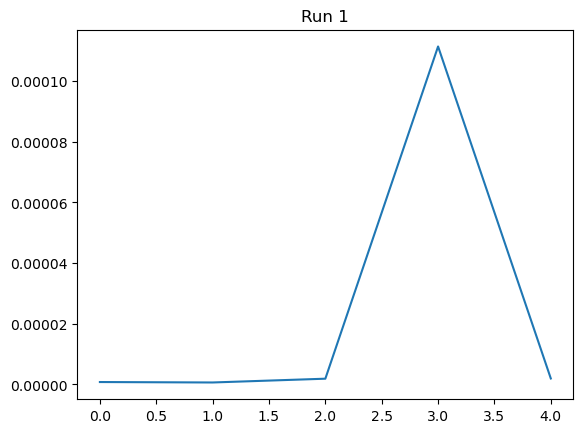

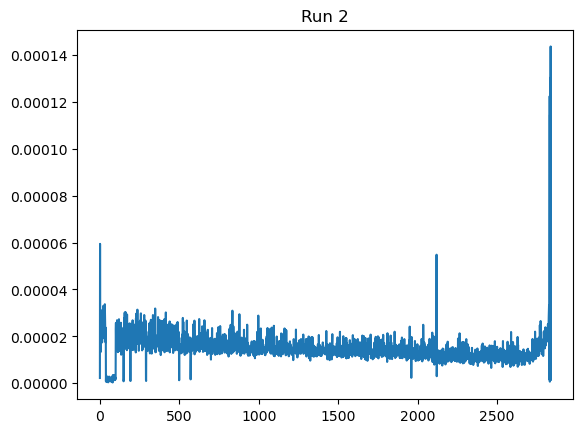

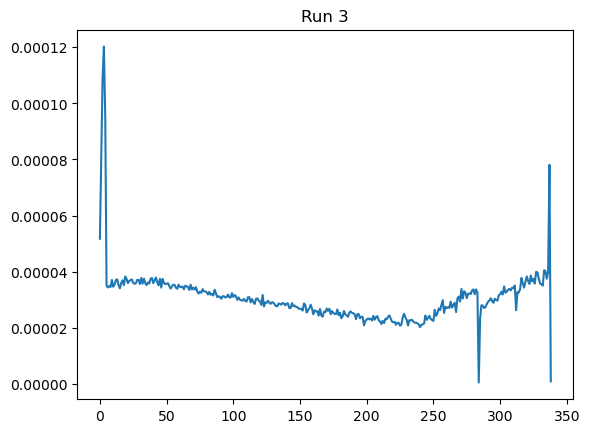

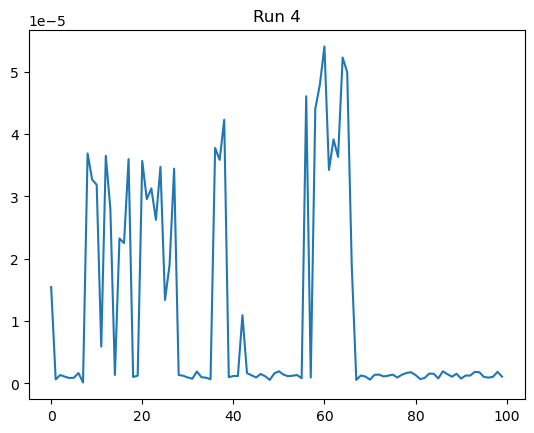

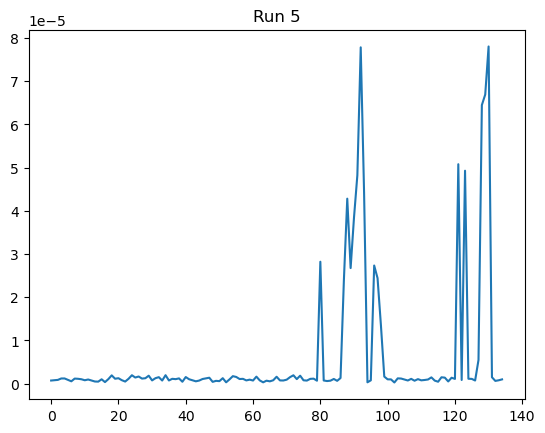

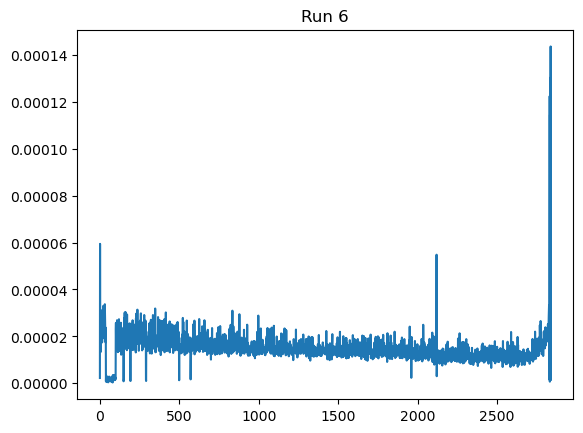

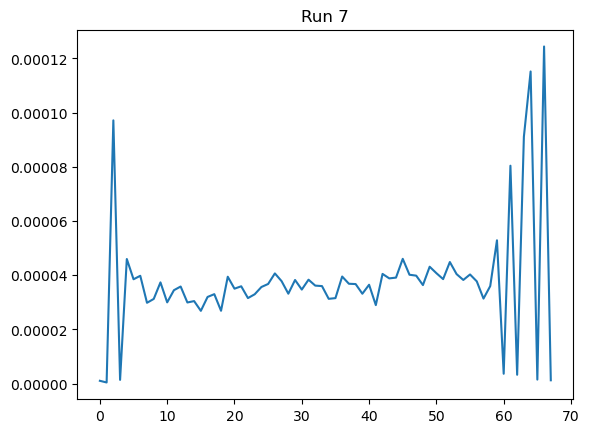

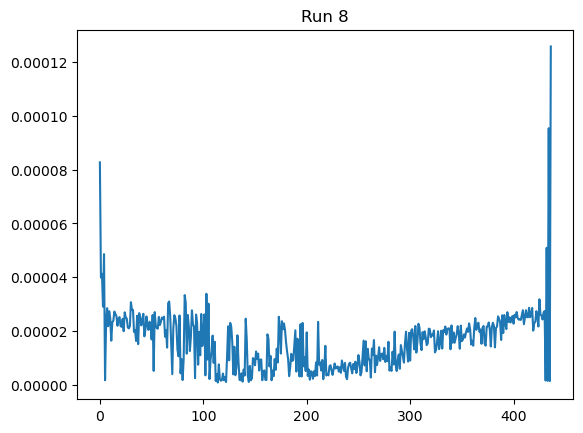

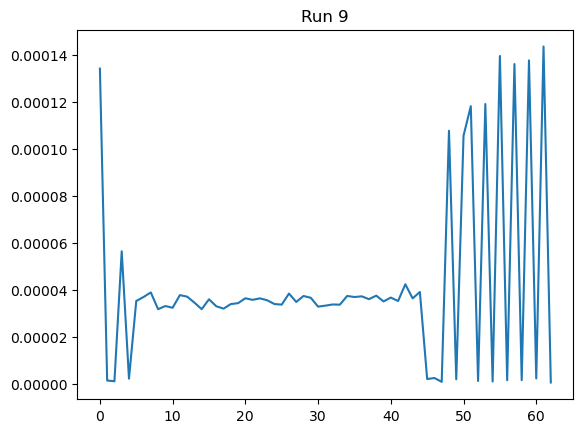

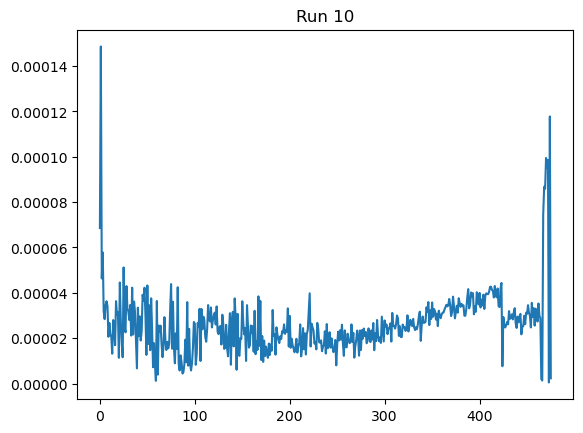

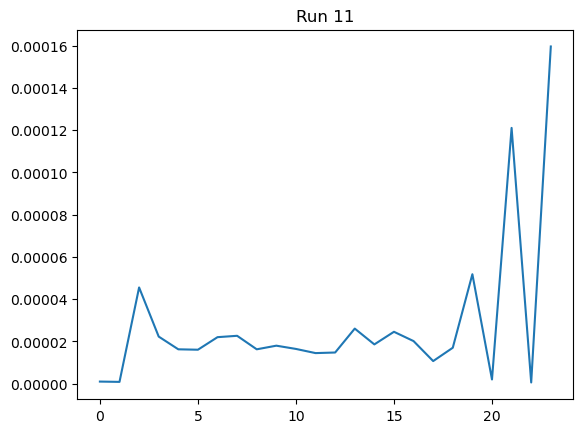

In [7]:
areas = [areas1, areas2, areas3, areas4, areas5, areas6, areas7, areas8, areas9, areas10, areas11]
run = 1

for areas in areas:
    plt.plot(areas)
    plt.title(f"Run {run}")
    run += 1
    plt.show()

In [8]:
from scipy.optimize import curve_fit, root_scalar
from scipy.special import erfc, erfcx
import numpy as np
import matplotlib.pyplot as plt

def emg_pdf(x, mu, sigma, lambd, A):
    """
    Exponentially Modified Gaussian distribution.
    """
    arg = (mu + lambd * sigma**2 - x) / (np.sqrt(2) * sigma)
    return A * (lambd / 2) * np.exp(lambd / 2 * (2 * mu + lambd * sigma**2 - 2 * x)) * erfc(arg)

# Define inverse of erfcx numerically
def erfcxinv(y):
    """
    Numerically computes the inverse of the scaled complementary error function (erfcx).
    Returns np.nan if no valid root is found.
    """
    if y < 1e-6 or y > 1e6:
        return np.nan  # outside stable inversion range
    def func(x):
        return erfcx(x) - y
    try:
        sol = root_scalar(func, bracket=[-10, 10], method='brentq')
        return sol.root if sol.converged else np.nan
    except ValueError:
        return np.nan

def emg_mode(mu, sigma, lambd):
    """
    Computes the mode (peak) of the EMG using the analytical expression with domain-safe inversion.
    Returns np.nan if invalid.
    """
    tau = 1 / lambd
    factor = (abs(tau) / sigma) * np.sqrt(2 / np.pi)
    inv = erfcxinv(factor)
    if np.isnan(inv):
        return np.nan  # fallback or skip this fit
    return mu - np.sign(tau) * np.sqrt(2) * sigma * inv + (sigma**2 / tau)


def emg_fit(data, run):
    # Histogram
    hist_values, bin_edges = np.histogram(data, bins=100)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Initial guess
    mu_guess = np.mean(data)
    sigma_guess = np.std(data)
    lambd_guess = 1 / sigma_guess
    A_guess = max(hist_values)
    initial_guess = [mu_guess, sigma_guess, lambd_guess, A_guess]

    try:
        # Fit
        popt, pcov = curve_fit(emg_pdf, bin_centers, hist_values, p0=initial_guess, maxfev=50000)
        mu_fit, sigma_fit, lambd_fit, A_fit = popt
        mu_err, sigma_err, lambd_err, A_err = np.sqrt(np.diag(pcov))

        # Fit curve
        x_fit = np.linspace(min(data), max(data), 500)
        y_fit = emg_pdf(x_fit, *popt)

        # Compute mode
        x_peak = emg_mode(mu_fit, sigma_fit, lambd_fit)

        # Numerical error propagation for mode
        delta = 1e-6
        mode_plus_mu = emg_mode(mu_fit + delta, sigma_fit, lambd_fit)
        mode_plus_sigma = emg_mode(mu_fit, sigma_fit + delta, lambd_fit)
        mode_plus_lambda = emg_mode(mu_fit, sigma_fit, lambd_fit + delta)

        dmode_dmu = (mode_plus_mu - x_peak) / delta
        dmode_dsigma = (mode_plus_sigma - x_peak) / delta
        dmode_dlambda = (mode_plus_lambda - x_peak) / delta

        x_peak_err = np.sqrt(
            (dmode_dmu * mu_err) ** 2 +
            (dmode_dsigma * sigma_err) ** 2 +
            (dmode_dlambda * lambd_err) ** 2
        )

        if np.isnan(x_peak) == True:
            x_peak = np.mean(data)
            x_peak_err = x_peak / len(data)

        # Plot
        plt.figure(figsize=(10, 6))
        plt.hist(data, bins=100, alpha=0.5, density=False) #label="Data Histogram", density=False)
        plt.plot(x_fit, y_fit, 'r-') #label=f'EMG Fit:\nμ={mu_fit:.2e} ± {mu_err:.2e}\nσ={sigma_fit:.2e} ± {sigma_err:.2e}\nλ={lambd_fit:.2e} ± {lambd_err:.2e}')
        plt.axvline(x_peak, color='green', linestyle='--', label=f'MPV ≈ {x_peak:.2e} ± {x_peak_err:.2e}')
        plt.xlabel("Charge released (mVs)")
        plt.ylabel("Events")
        plt.title(f"Charge Histogram - RUN {run}", weight="bold")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    except RuntimeError as e:
        print(f"Fit failed: {e}")
        return None

    return mu_fit, sigma_fit, lambd_fit, mu_err, sigma_err, lambd_err, x_peak, x_peak_err


def fit_routine(areas, nRUN_pressure, run, plot=True):
    start = 0
    fitparams = np.zeros((len(nRUN_pressure[:,1]), 8))
    for k in range(len(nRUN_pressure[:,1])):
        window = int(nRUN_pressure[:,1][k])
        data = areas[start:window]
        fitparams[k] = emg_fit(data, run + " " + str(p_windows[k]) + "-" + str(p_windows[k+1]) + "mBar")
        start = int(window)
    return fitparams

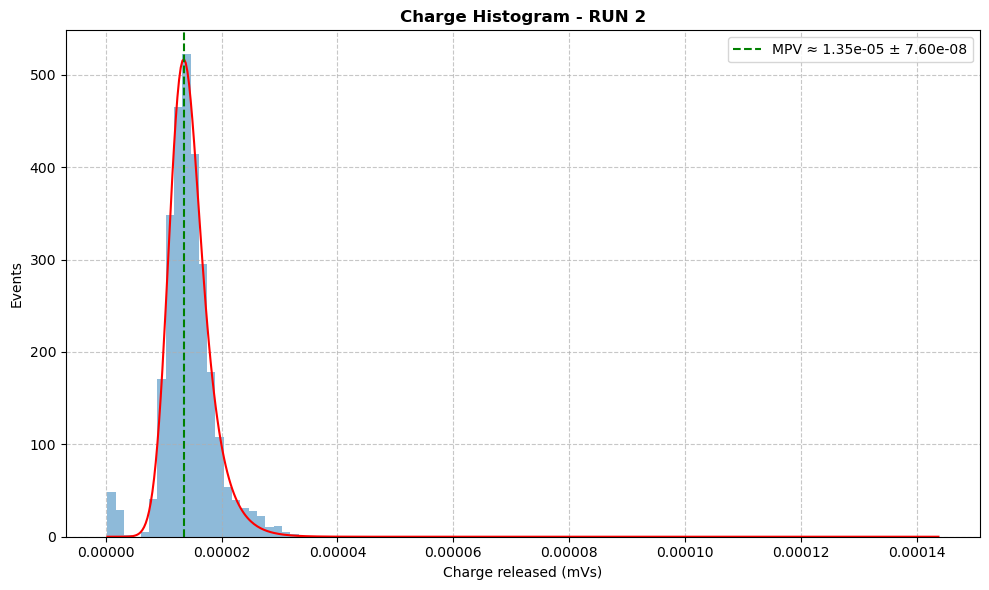

C:\Users\louis\AppData\Local\Temp\ipykernel_13108\1815538138.py:11: RuntimeWarning: overflow encountered in exp
  return A * (lambd / 2) * np.exp(lambd / 2 * (2 * mu + lambd * sigma**2 - 2 * x)) * erfc(arg)
C:\Users\louis\AppData\Local\Temp\ipykernel_13108\1815538138.py:11: RuntimeWarning: overflow encountered in multiply
  return A * (lambd / 2) * np.exp(lambd / 2 * (2 * mu + lambd * sigma**2 - 2 * x)) * erfc(arg)
C:\Users\louis\AppData\Local\Temp\ipykernel_13108\1815538138.py:11: RuntimeWarning: invalid value encountered in multiply
  return A * (lambd / 2) * np.exp(lambd / 2 * (2 * mu + lambd * sigma**2 - 2 * x)) * erfc(arg)


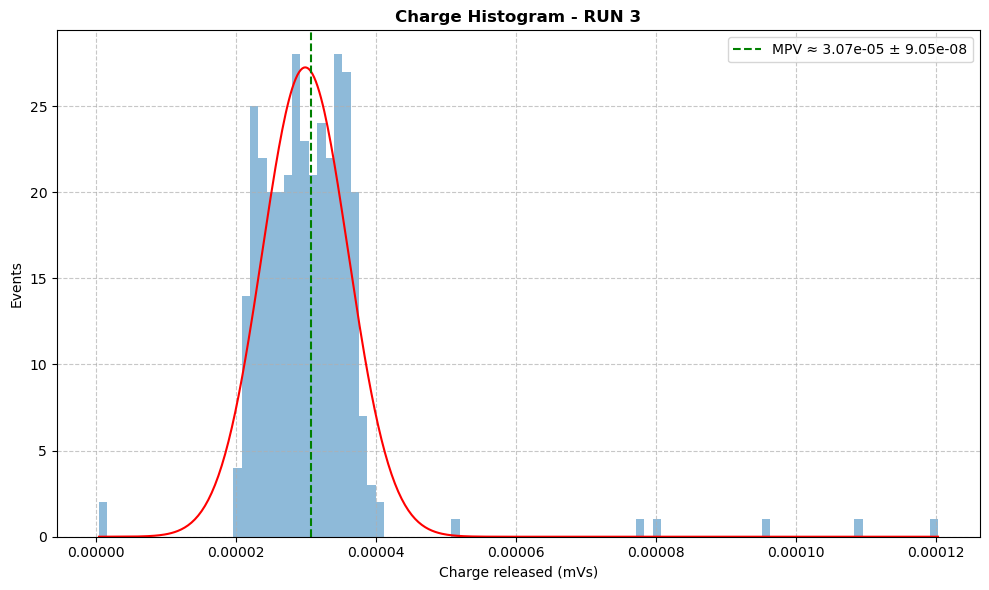

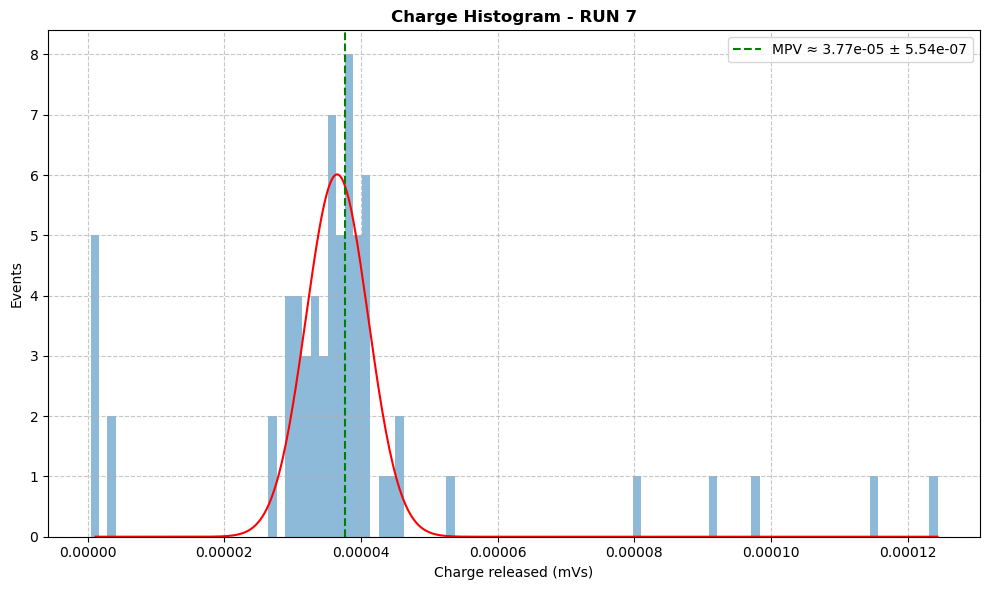

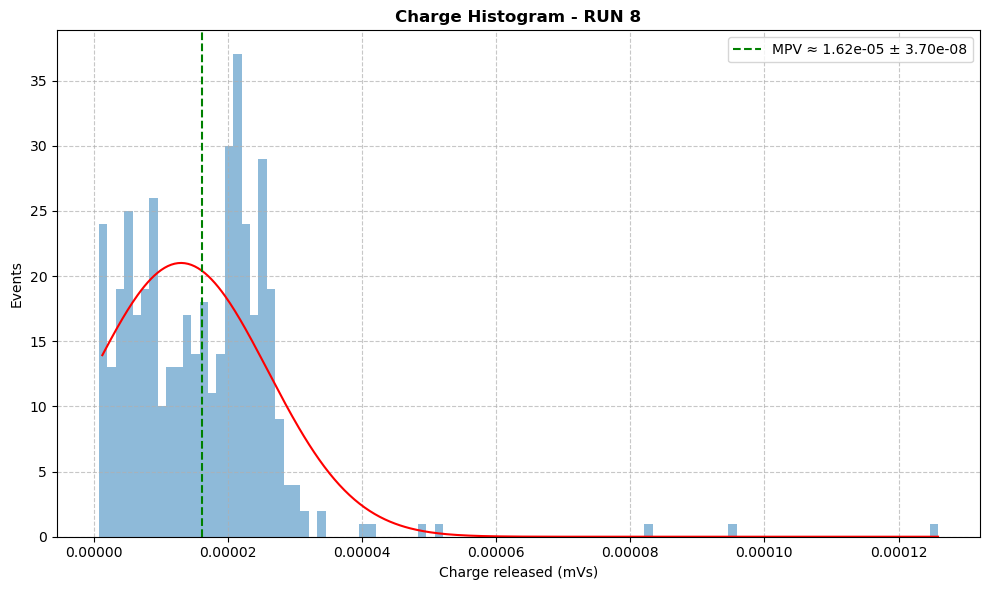

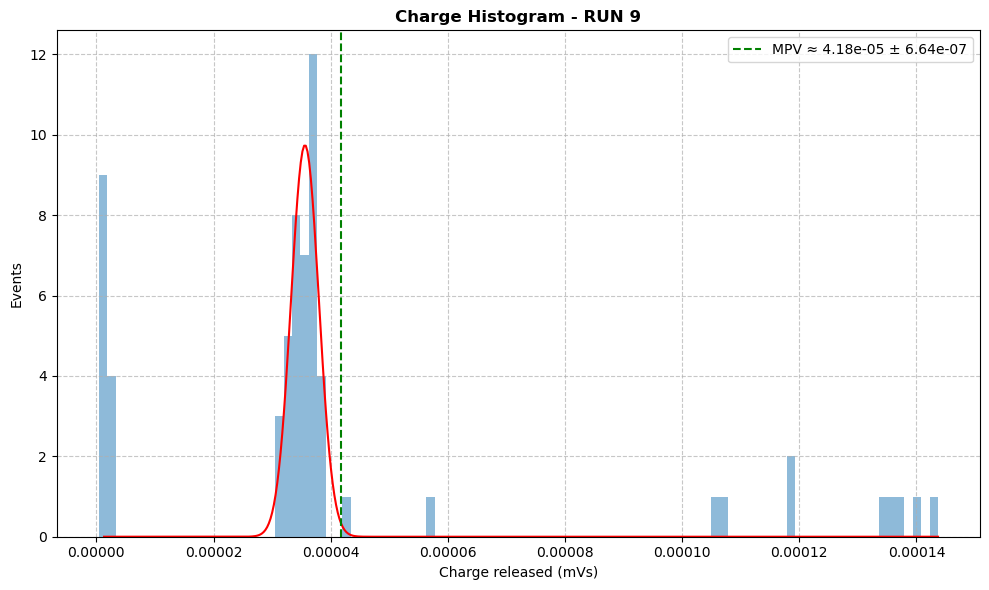

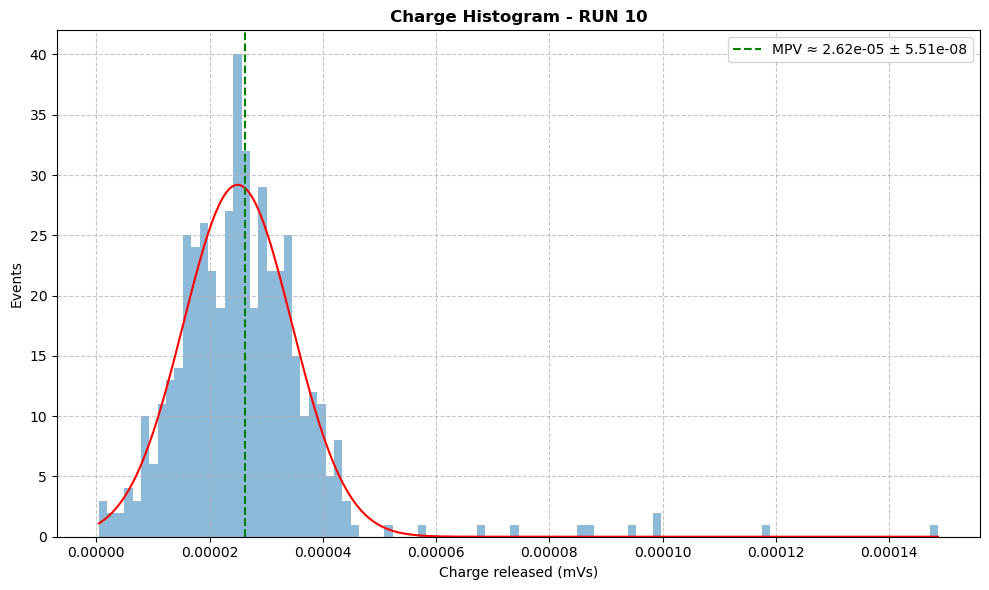

In [9]:
#mu_fit1, sigma_fit1, lambd_fit1, mu_err1, sigma_err1, lambd_err1, peak1, peak_err1 = emg_fit(areas1, "1")
mu_fit2, sigma_fit2, lambd_fit2, mu_err2, sigma_err2, lambd_err2, peak2, peak_err2 = emg_fit(areas2, "2")
mu_fit3, sigma_fit3, lambd_fit3, mu_err3, sigma_err3, lambd_err3, peak3, peak_err3 = emg_fit(areas3, "3")
#mu_fit4, sigma_fit4, lambd_fit4, mu_err4, sigma_err4, lambd_err4, peak4, peak_err4 = emg_fit(areas4, "4")
#mu_fit5, sigma_fit5, lambd_fit5, mu_err5, sigma_err5, lambd_err5, peak5, peak_err5 = emg_fit(areas5, "5")
#mu_fit6, sigma_fit6, lambd_fit6, mu_err6, sigma_err6, lambd_err6, peak6, peak_err6 = emg_fit(areas6, "6")
mu_fit7, sigma_fit7, lambd_fit7, mu_err7, sigma_err7, lambd_err7, peak7, peak_err7 = emg_fit(areas7, "7")
mu_fit8, sigma_fit8, lambd_fit8, mu_err8, sigma_err8, lambd_err8, peak8, peak_err8 = emg_fit(areas8, "8")
mu_fit9, sigma_fit9, lambd_fit9, mu_err9, sigma_err9, lambd_err9, peak9, peak_err9 = emg_fit(areas9, "9")
mu_fit10, sigma_fit10, lambd_fit10, mu_err10, sigma_err10, lambd_err10, peak10, peak_err10 = emg_fit(areas10, "10")
#mu_fit11, sigma_fit11, lambd_fit11, mu_err11, sigma_err11, lambd_err11, peak11, peak_err11 = emg_fit(areas11, "11")

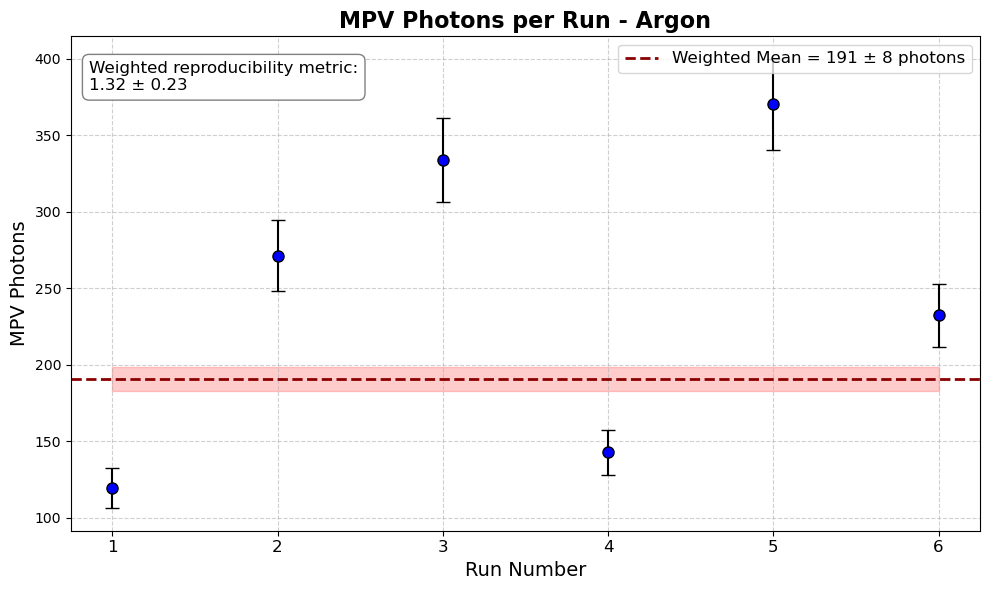

Reproducible within 251.01988505018826 +/- 42.82446725569835 photons.


In [12]:
mpvs = np.array([peak2, peak3, peak7, peak8, peak9, peak10])
photons = (mpvs / 1e3 - 8.42e-12) / 1.13e-10
mpv_errs = np.array([peak_err2, peak_err3, peak_err7, peak_err8, peak_err9, peak_err10])
photon_err = np.sqrt((np.sqrt((mpv_errs / mpvs) ** 2 + (6.71e-12 / 1.13e-10) ** 2) * photons + 1.11e-11)**2 + photons)

x_vals = np.arange(len(mpvs))
x_labels = [1, 2, 3, 4, 5, 6]

# Compute the weighted mean and its error
weights = 1 / photon_err**2
constant_fit = np.sum(photons * weights) / np.sum(weights)
constant_fit_err = np.sqrt(1 / np.sum(weights))

import matplotlib.pyplot as plt
import numpy as np

# Use a clean style
plt.style.use("default")

fig, ax = plt.subplots(figsize=(10, 6))

# Plot data with error bars
ax.errorbar(
    x_vals, photons, yerr=photon_err, fmt='o',
    markersize=8, capsize=5, color='blue', ecolor='black',
    markeredgecolor='black'
)

# Horizontal fit line and uncertainty
ax.axhline(y=constant_fit, color='darkred', linestyle='--', linewidth=2,
           label=f'Weighted Mean = {constant_fit:.0f} ± {constant_fit_err:.0f} photons')
ax.fill_between(
    x_vals,
    constant_fit - constant_fit_err,
    constant_fit + constant_fit_err,
    color='red', alpha=0.2
)

# X ticks and labels
ax.set_xticks(x_vals)
ax.set_xticklabels(x_labels, fontsize=12)

# Labels and title
ax.set_xlabel("Run Number", fontsize=14)
ax.set_ylabel("MPV Photons", fontsize=14)
ax.set_title("MPV Photons per Run - Argon", fontsize=16, weight='bold')

# Annotation for reproducibility
repro_diff = (photons[4] - photons[0]) / constant_fit
repro_err = np.sqrt(((photon_err[4] + photon_err[0])/(photons[4] - photons[0]))**2 + (constant_fit_err/constant_fit)**2) * repro_diff
annot_text = f"Weighted reproducibility metric:\n{repro_diff:.2f} ± {repro_err:.2f}"

# Place annotation in upper left corner
ax.text(0.02, 0.95, annot_text, transform=ax.transAxes,
        fontsize=12, verticalalignment='top',
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4'))

# Grid and legend
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12, loc='upper right')

# Layout
plt.tight_layout()
plt.show()


print("Reproducible within " + str(photons[4] - photons[0]) + " +/- " + str(photon_err[4] + photon_err[0]) + " photons.")